In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Data Load
co2_data = pd.read_csv('https://raw.githubusercontent.com/giofile/CO2-Analysis-QueryOne/main/owid-co2-data.csv')
sector_data = pd.read_excel('https://raw.githubusercontent.com/giofile/CO2-Analysis-QueryOne/main/Global-GHG-Emissions-by-sector-based-on-WRI-2020.xlsx')
per_capita_data = pd.read_csv('https://raw.githubusercontent.com/giofile/CO2-Analysis-QueryOne/main/per-capita-co2-sector.csv')
transport_data = pd.read_csv(
    'https://raw.githubusercontent.com/giofile/CO2-Analysis-QueryOne/main/transport-sector-co2-emissions-by-mode-in-the-sustainable-development-scenario-2000-2030.csv', delimiter=';')


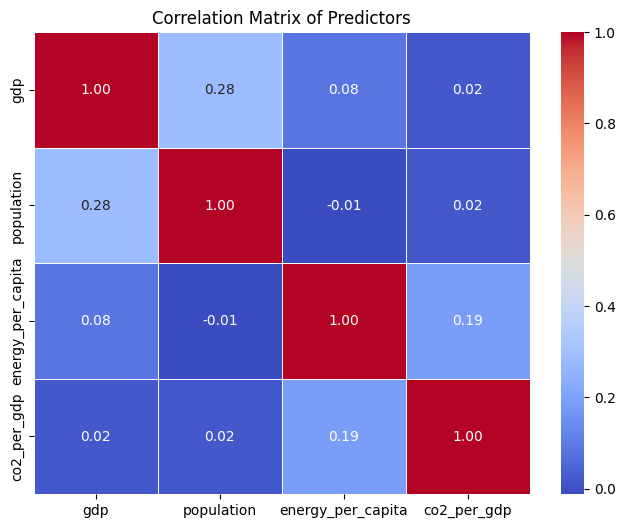

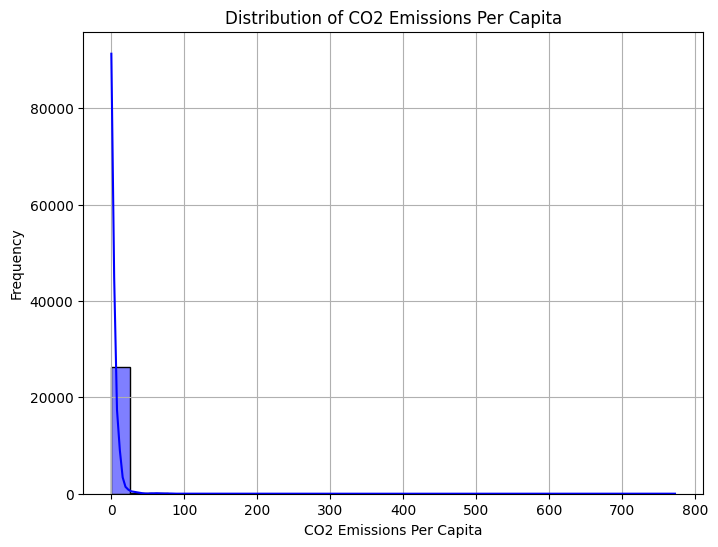

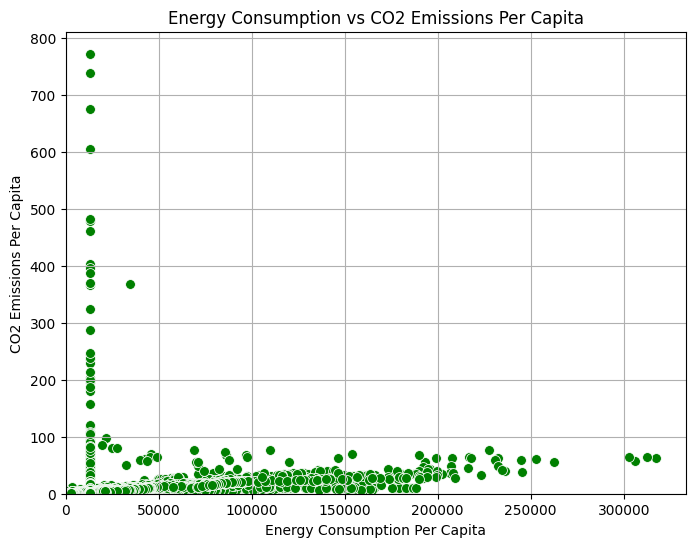

In [3]:

# Function to load data 
def load_data(url=None, local_path=None):
    if url:
        try:
            df = pd.read_csv(url).copy()  # Using .copy() to prevent potential warnings
        except Exception as e:
            print(f"Failed to load data from URL: {e}")
            return None
    elif local_path:
        try:
            df = pd.read_csv(local_path).copy()
        except Exception as e:
            print(f"Failed to load data from local file: {e}")
            return None
    else:
        print("Please provide either a URL or a local file path.")
        return None
    return df

# Function to preprocess the data
def preprocess_data(df):
    # Handle missing values with median for predictors
    df['gdp'].fillna(df['gdp'].median(), inplace=True)
    df['population'].fillna(df['population'].median(), inplace=True)
    df['energy_per_capita'].fillna(df['energy_per_capita'].median(), inplace=True)
    df['co2_per_gdp'].fillna(df['co2_per_gdp'].median(), inplace=True)

    # Remove rows where the target variable 'co2_per_capita' is NaN
    df = df.dropna(subset=['co2_per_capita'])

    return df

# Function to plot and visualize the correlation matrix
def plot_correlation(df):
    correlation_matrix = df[['gdp', 'population', 'energy_per_capita', 'co2_per_gdp']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Predictors')
    plt.show()

# Function to plot distribution of CO2 emissions per capita
def plot_distribution(df):
    plt.figure(figsize=(8, 6))
    sns.histplot(df['co2_per_capita'], bins=30, kde=True, color='blue')
    plt.title('Distribution of CO2 Emissions Per Capita')
    plt.xlabel('CO2 Emissions Per Capita')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Function to plot energy consumption vs CO2 emissions
def plot_energy_vs_co2(df):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['energy_per_capita'], y=df['co2_per_capita'], color='green', s=50)
    plt.title('Energy Consumption vs CO2 Emissions Per Capita')
    plt.xlabel('Energy Consumption Per Capita')
    plt.ylabel('CO2 Emissions Per Capita')
    plt.grid(True)
    plt.xlim(left=0)  # Ensuring the x-axis starts from 0
    plt.ylim(bottom=0)  # Ensuring the y-axis starts from 0
    plt.show()

# Main Execution Flow
def main():
    # Use local file for now, you can replace this with a valid URL if needed
    local_file = "https://raw.githubusercontent.com/giofile/CO2-Analysis-QueryOne/main/owid-co2-data.csv"

    # Load the dataset
    co2_data = load_data(local_path=local_file)

    # If data loading fails, terminate
    if co2_data is None:
        print("Data loading failed.")
        return

    # Preprocess the data
    co2_data = preprocess_data(co2_data)

    # Visualize the correlation matrix
    plot_correlation(co2_data)

    # Plot distribution of CO2 emissions per capita
    plot_distribution(co2_data)

    # Plot Energy Consumption vs CO2 Emissions
    plot_energy_vs_co2(co2_data)

# Execute the main function
if __name__ == "__main__":
    main()




### 1. **Correlation Matrix of Predictors**:
   This graph shows how variables like GDP, population, and energy consumption are related. Higher correlation values indicate stronger relationships between variables. It helps identify which factors most strongly influence CO2 emissions per capita.

### 2. **Distribution of CO2 Emissions Per Capita**:
   This graph displays how CO2 emissions per person are distributed across countries. Peaks show where most countries fall in terms of emissions. It helps understand the typical levels of CO2 output per person globally.

### 3. **Energy Consumption vs. CO2 Emissions Per Capita**:
   This scatter plot shows the relationship between energy use and CO2 emissions. Each point represents a country’s energy consumption and its corresponding CO2 emissions. A clear upward trend suggests higher energy use leads to higher emissions.

### Conclusion:

**What is the biggest predictor of a large CO2 output per capita of a country?**

The biggest predictor of a large CO2 output per capita of a country is energy consumption per capita. Countries with higher energy use tend to have significantly higher CO2 emissions, making energy consumption the most influential factor in determining CO2 output. While other factors such as GDP and population contribute to CO2 emissions, their impact is relatively minor compared to energy use.

This analysis indicates that reducing energy consumption or transitioning to cleaner energy sources could be the most effective strategy for lowering CO2 emissions per capita. Other factors, though relevant, do not have the same level of influence in determining CO2 output as energy consumption does. Therefore, focusing on energy use is crucial for addressing CO2 emissions on a per capita basis.
